# Linear Classification 
In this exercise we were provided with the code skeleton which loads the data as training and test sets. The following code cell is the provided code snippet.

In [1]:
import scipy.io
import numpy as np
from sklearn.metrics import *
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap
import scipy.io
import numpy as np
from sklearn.metrics import *
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

cb_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

def load_data():
    mat = scipy.io.loadmat('Classification.mat')
    x_train = mat["xTrain"]
    y_train = mat["tTrain"][:, 0]
    x_test = mat["xTest"]
    y_test = mat["tTest"][:, 0]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_data()

print("loaded data:")
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)
print("x_train")
print(x_train,y_train)
print("x_test:")
print(x_test,y_test)

loaded data:
Train: (500, 2) (500,)
Test: (500, 2) (500,)
x_train
[[ 2.08217728e+00 -9.12701137e-01]
 [ 6.58460325e-01 -2.67959146e+00]
 [ 1.19864342e+00  1.97885180e+00]
 [-6.97355760e-02 -1.45550376e+00]
 [-8.42798953e-01  1.11525568e+00]
 [ 5.48757119e+00 -1.05224668e+00]
 [ 1.15625749e+00  1.14551860e+00]
 [ 3.75460503e+00 -4.00299289e+00]
 [ 1.69865966e+00  2.55678622e+00]
 [ 3.30623075e+00 -5.24478348e-01]
 [-2.82621025e+00  9.17531998e-01]
 [-2.85510913e+00 -2.35526731e+00]
 [ 2.29655883e+00 -2.48590892e+00]
 [-6.90574222e-01  4.28744666e+00]
 [ 5.27525098e-01 -3.81760208e-01]
 [-1.95254885e+00 -4.57977458e+00]
 [ 6.41298841e-01 -4.39235663e-01]
 [-2.57001405e+00  1.00890280e+00]
 [-4.36129448e+00 -2.11534366e+00]
 [ 1.60492809e+00 -2.18047937e+00]
 [ 8.81257057e-01 -1.74885273e-01]
 [-1.11380850e+00  3.21771701e+00]
 [-3.02445596e+00 -1.59541769e+00]
 [ 1.27993623e+00 -3.76796196e+00]
 [-1.14875770e+00 -4.66450607e-01]
 [ 2.35853555e+00 -1.69848934e+00]
 [ 4.95189211e-02 -1.059

In the first part of the exercise we have to calculate the Fisher discriminant. To do so we have to calculate the means and the covariances of the two classes. The calculation should be done by "hand" to understand the fisher discriminant better. Later we will implement the fisher discriminant by using appropriate libraries. 

In [2]:
x_pos_train = x_train[np.where(y_train == 1)]
x_neg_train = x_train[np.where(y_train == -1)]

mean_pos = np.array(np.mean(x_pos_train,axis=0))
mean_neg = np.array(np.mean(x_neg_train,axis=0))

mean_neg = mean_neg.reshape((-1,1))
mean_pos = mean_pos.reshape((-1,1))



S_B = np.dot(mean_pos - mean_neg, (mean_pos - mean_neg).T)

S_W = np.cov(x_neg_train, rowvar=False) + np.cov(x_pos_train, rowvar=False)
omega = np.matmul(np.linalg.inv(S_W), (mean_pos-mean_neg))
omega0 = np.dot(-np.mean(x_train, axis=0, keepdims=True), omega)[0]


The next exercise is to visualize the data and the fisher discriminant.

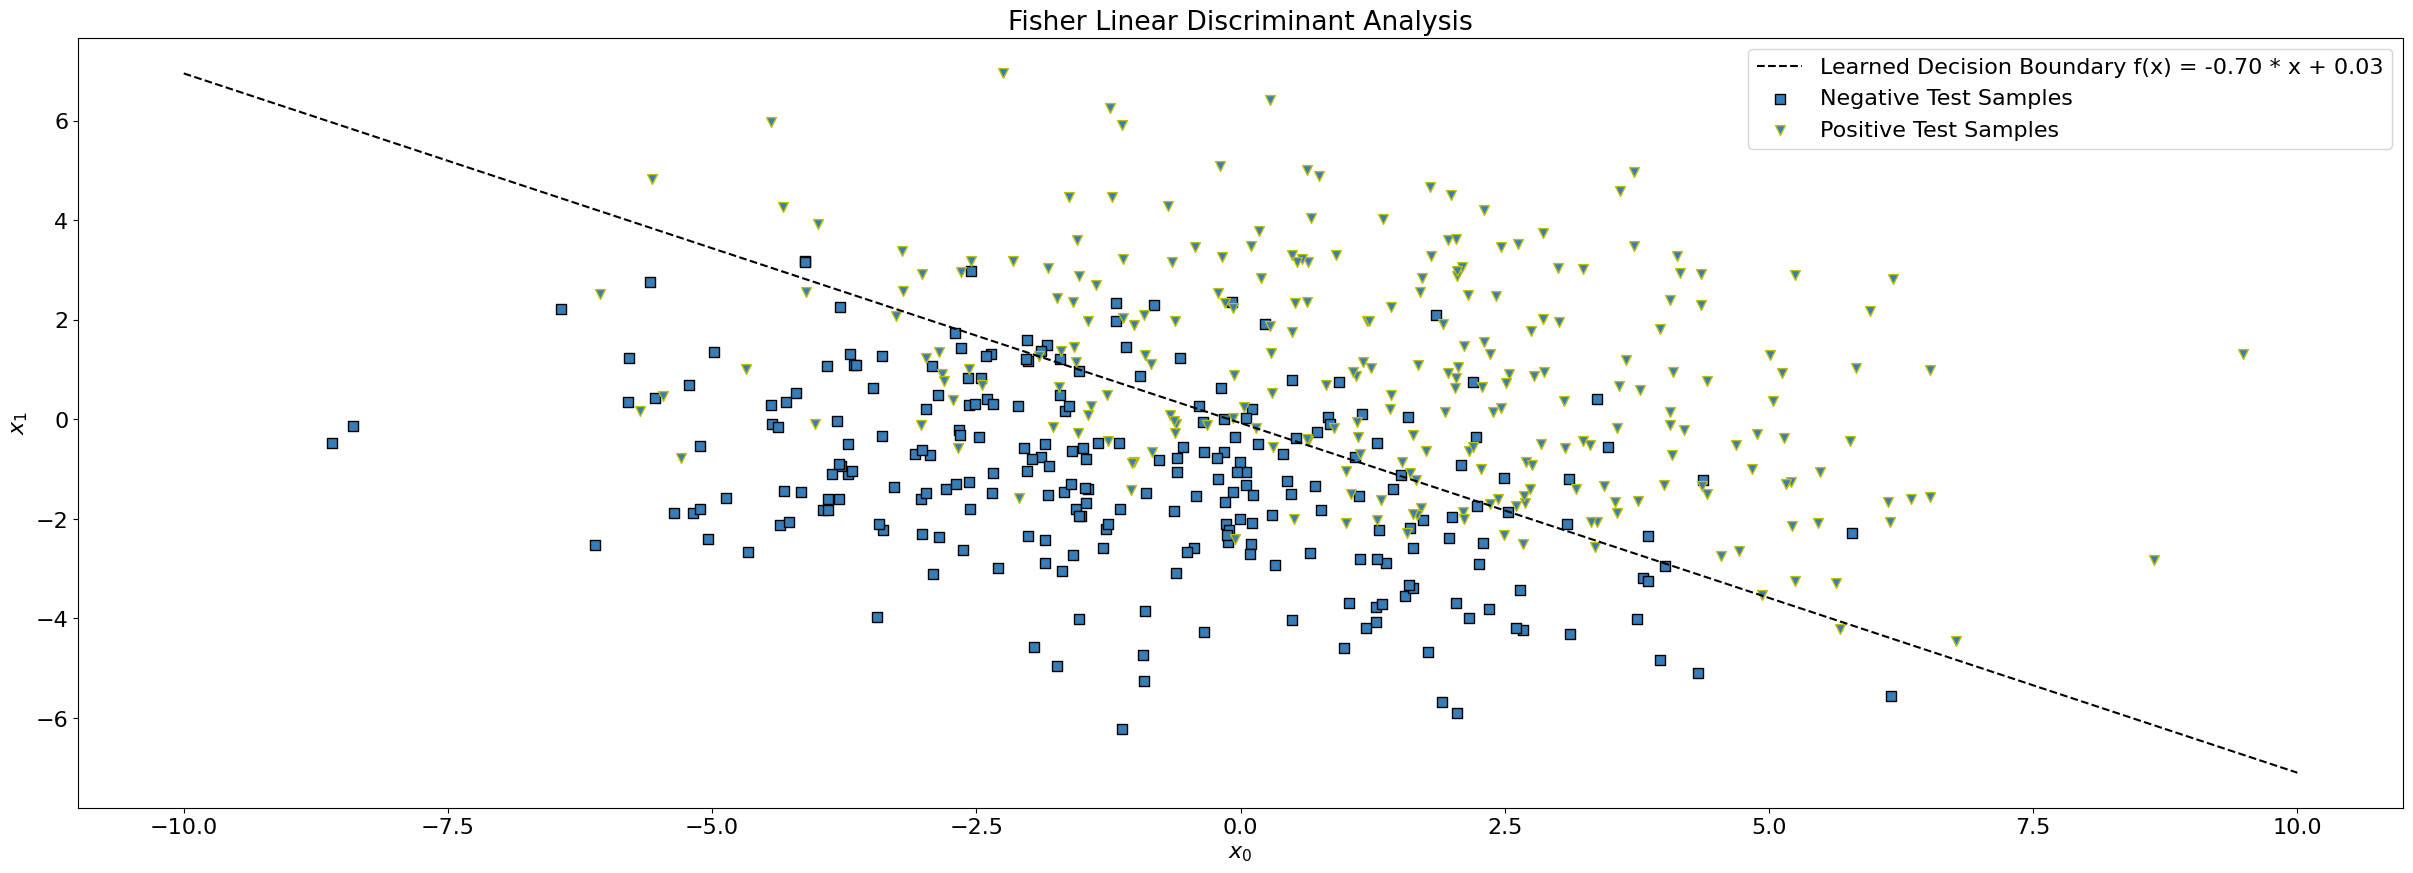

In [16]:
a = -omega[0] / omega[1]
xx = np.linspace(-10,10)
yy  = a * xx - omega0/omega[1]
f, ax = plt.subplots(1,1,figsize=(30,10))
ax.plot(xx,yy,'k--',label="Learned Decision Boundary f(x) = %.2f * x + %.2f" % (a, omega0))
ax.scatter(x_neg_train[:,0], x_neg_train[:,1], s=50, c=cb_color_cycle[0], edgecolor='k', marker='s', label="Negative Test Samples")
ax.scatter(x_pos_train[:,0], x_pos_train[:,1], s=50, c=cb_color_cycle[0], edgecolor='y', marker='v', label="Positive Test Samples")
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.set_title("Fisher Linear Discriminant Analysis")
ax.legend()
plt.show()

In the next exercise we will do exactly the same however we do the calculations with the scikit-image library. We define our model via the following.

In [17]:
lda = LinearDiscriminantAnalysis(solver="lsqr") #lsqr = least square
y_pred = lda.fit(x_train, y_train).predict(x_train)


Getting the accuracy score of testing onto the training set.

In [20]:
err = accuracy_score(y_true= y_train, y_pred=y_pred)
print("LDA Error: %.3f" % (1-err))

LDA Error: 0.188


Now we can simple define the necessary parameters via 

In [22]:
omega = lda.coef_[0]
omega0 = lda.intercept_[0]
a = -omega[0] / omega[1]
xx = np.linspace(-10,10)
yy = a * xx - omega0/omega[1]


The only thing left to do is to actually plot it. 

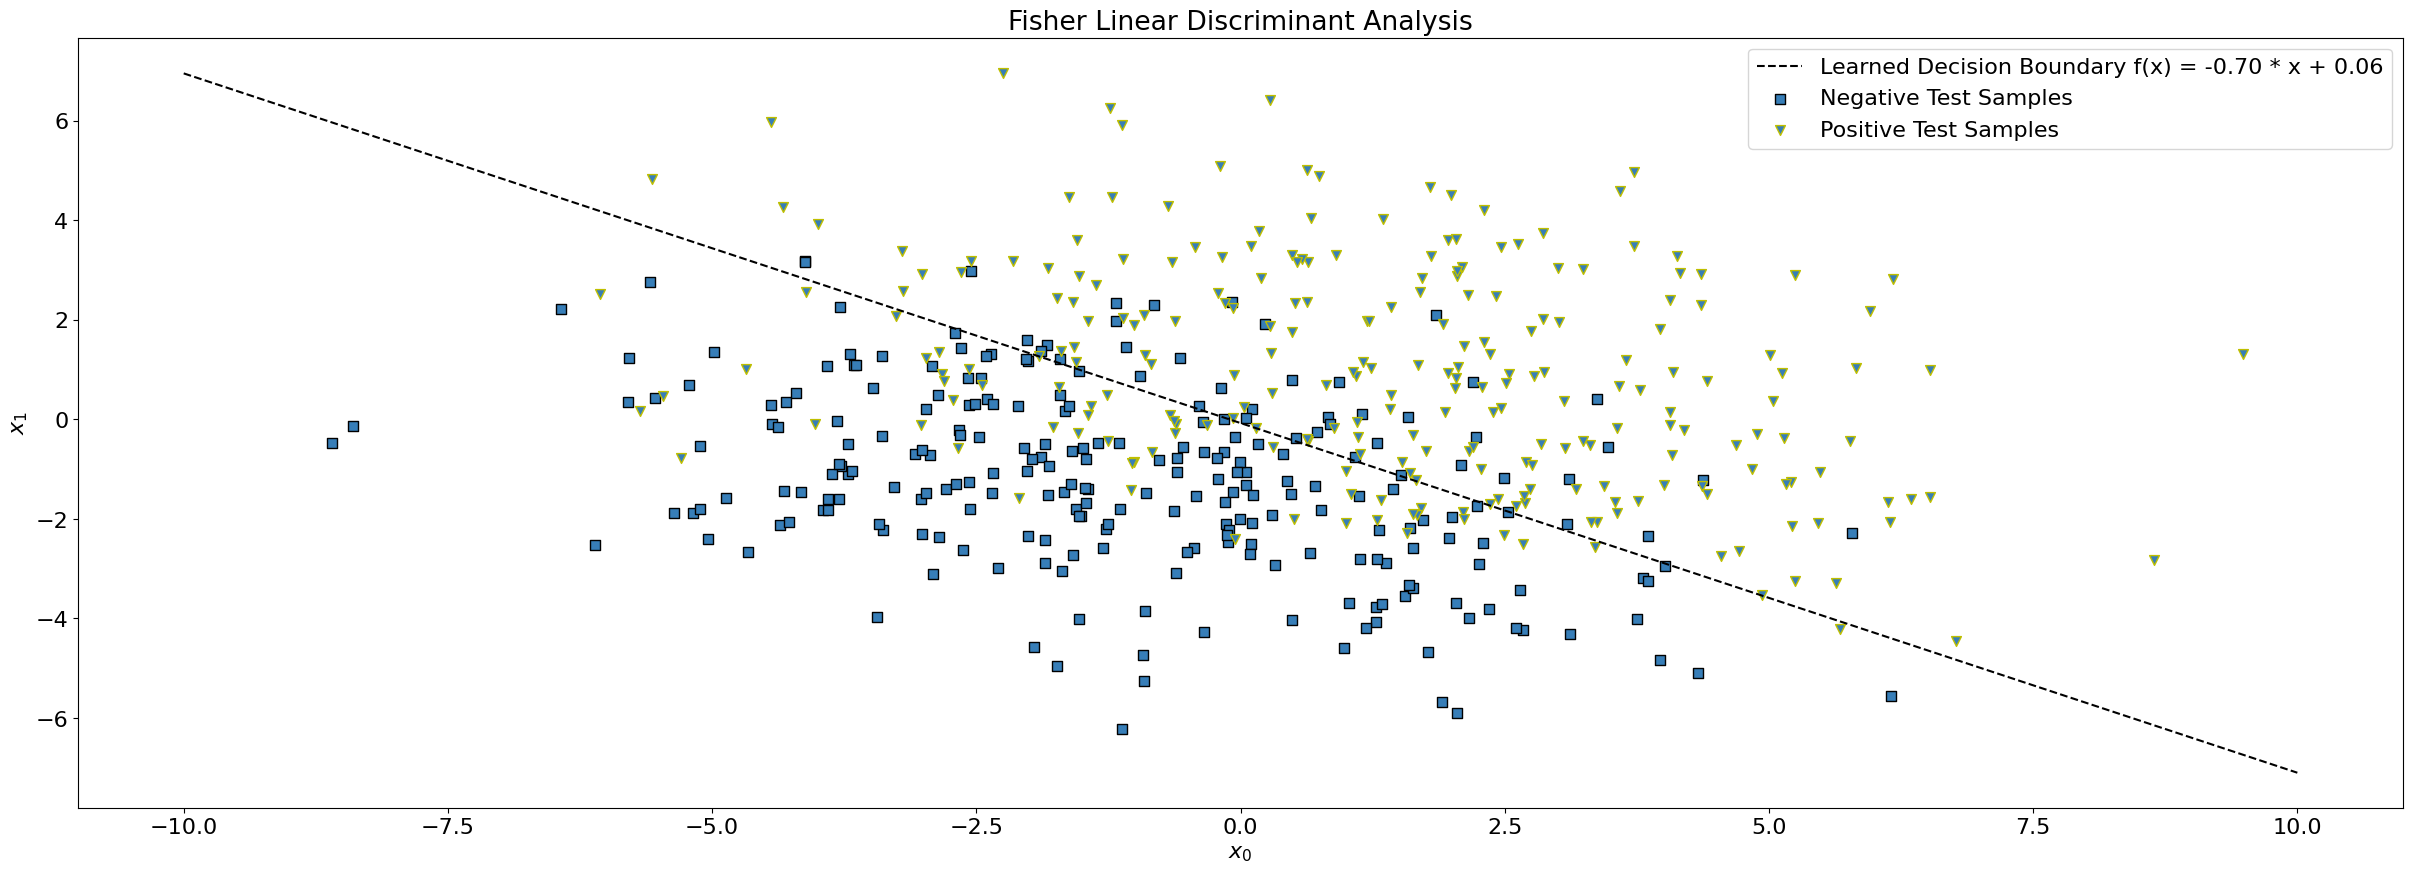

In [23]:
f, ax = plt.subplots(1,1,figsize=(30,10))
ax.plot(xx, yy, 'k--', label="Learned Decision Boundary f(x) = %.2f * x + %.2f" %(a,omega0))
ax.scatter(x_neg_train[:,0], x_neg_train[:,1], s=50, c=cb_color_cycle[0], edgecolor='k', marker='s', label="Negative Test Samples")
ax.scatter(x_pos_train[:,0], x_pos_train[:,1], s=50, c=cb_color_cycle[0], edgecolor='y', marker='v', label="Positive Test Samples")
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.set_title("Fisher Linear Discriminant Analysis")
ax.legend()
plt.show()